In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clean-cic-ids-2018/test/test.csv
/kaggle/input/clean-cic-ids-2018/train/03-01-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/02-22-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/02-21-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/02-23-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/02-15-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/02-28-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/02-16-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/03-02-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/02-14-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/02-20-2018_clean.csv


In [2]:
# Define the list of file names
file_names = [
    "/kaggle/input/clean-cic-ids-2018/train/02-14-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/02-15-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/02-16-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/02-20-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/02-21-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/02-22-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/02-23-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/02-28-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/03-01-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/03-02-2018_clean.csv"
]

# Initialize an empty list to store the DataFrames
dfs = []

# Loop through the file names and read each file as a DataFrame
for file_name in file_names:
    df = pd.read_csv(file_name)
    dfs.append(df)

# Concatenate the DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

# Print the shape of the combined DataFrame
print(df.shape)

(12639793, 71)


In [3]:
test_combined_df = pd.read_csv("/kaggle/input/clean-cic-ids-2018/test/test.csv", index_col=False)
test_combined_df = test_combined_df.drop(columns='Unnamed: 0')
print(test_combined_df.shape)

(3159955, 71)


In [4]:
features = [
    "PSH Flag Cnt",
    "Dst Port",
    "Init Fwd Win Byts",
    "RST Flag Cnt",
    "Fwd PSH Flags",
    "Bwd IAT Max",
    "Date",
    "Fwd IAT Tot",
    "Fwd IAT Max",
    "Fwd IAT Min",
    "Fwd Seg Size Min",
    "Bwd Seg Size Avg",
    "Flow Duration",
    "Init Bwd Win Byts",
    "Fwd IAT Mean",
    "Pkt Len Std",
    "Bwd Pkts/s",
    "Time",
    "Bwd Pkt Len Mean",
    "Fwd Pkt Len Max",
    "Fwd Pkts/s",
    "Bwd Header Len",
    "Bwd IAT Tot",
    "Pkt Len Max",
    "Bwd Pkt Len Min",
    "Bwd Pkt Len Max",
    "Subflow Fwd Byts",
    "Flow IAT Max",
    "ACK Flag Cnt",
    "Flow IAT Mean",
    "TotLen Fwd Pkts",
    "Fwd Header Len",
    "Protocol",
    "ECE Flag Cnt",
    "Pkt Len Var",
    "SYN Flag Cnt"
]
len(features)

36

In [5]:
cols_to_drop = [col for col in df.columns if col not in features and col != 'Label']
df.drop(cols_to_drop, axis=1, inplace=True)
test_combined_df.drop(cols_to_drop, axis=1, inplace=True)

In [6]:
label_counts = df["Label"].value_counts()
print(label_counts)

0    10757216
3     1401476
1      225697
4      129373
2      125965
5          66
Name: Label, dtype: int64


In [7]:
sampled_df = pd.DataFrame(columns=["Label"])

# Filter instances with label 5
label_5_instances = df[df["Label"] == 5]

# Sample 100,000 instances for each label from 0 to 5
for label in range(5):
    label_sample = df[df["Label"] == label].sample(n=100000, replace=True, random_state=42)
    sampled_df = pd.concat([sampled_df, label_sample])

# Combine the sampled instances with label 5 instances
combined_df = pd.concat([sampled_df, label_5_instances])

# Shuffle the final sample
combined_df = combined_df.sample(frac=1, random_state=42)

print(combined_df)

         Label  Dst Port  Protocol  Flow Duration  TotLen Fwd Pkts  \
126509       2      22.0       6.0       396199.0           1928.0   
11229493     4      53.0      17.0         2072.0             40.0   
11149078     4      53.0      17.0          404.0             46.0   
456536       2      21.0       6.0            1.0              0.0   
591669       2      21.0       6.0            2.0              0.0   
...        ...       ...       ...            ...              ...   
569875       2      21.0       6.0            1.0              0.0   
2730310      3      80.0       6.0      1253008.0             20.0   
11916793     1    8080.0       6.0          640.0              0.0   
12107725     1    8080.0       6.0          510.0              0.0   
12045931     1    8080.0       6.0        10967.0            326.0   

          Fwd Pkt Len Max  Bwd Pkt Len Max  Bwd Pkt Len Min  Bwd Pkt Len Mean  \
126509              640.0            976.0              0.0             133.0 

In [8]:
label_counts = combined_df["Label"].value_counts()
print(label_counts)

2    100000
4    100000
0    100000
3    100000
1    100000
5        66
Name: Label, dtype: int64


In [9]:
from sklearn.feature_selection import (chi2, f_classif, mutual_info_classif, RFE, SelectFromModel, SelectKBest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score)
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler

X_train = combined_df.drop(columns='Label')
y_train = combined_df['Label']

X_test = test_combined_df.drop(columns='Label')
y_test = test_combined_df['Label']

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [11]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model with an increased max_iter value
logreg = LogisticRegression(max_iter=1000)  # Increased max_iter value

# 1. Information Gain (IG)
selector_ig = SelectKBest(score_func=mutual_info_classif, k=20)
X_train_ig = selector_ig.fit_transform(X_train, y_train)
X_test_ig = selector_ig.transform(X_test)
selected_columns_ig = X_train.columns[selector_ig.get_support()]

# 2. Chi-Square (CS)
selector_cs = SelectKBest(score_func=chi2, k=20)
X_train_cs = selector_cs.fit_transform(X_train_scaled, y_train)
X_test_cs = selector_cs.transform(X_test_scaled)
selected_columns_cs = X_train.columns[selector_cs.get_support()]

# 3. Gain Ratio (GR)
def gain_ratio(X, y):
    mi = mutual_info_classif(X, y)
    H_y = -np.sum(np.unique(y, return_counts=True)[1] / len(y) * np.log2(np.unique(y, return_counts=True)[1] / len(y)))
    return mi / H_y

selector_gr = SelectKBest(score_func=gain_ratio, k=20)
X_train_gr = selector_gr.fit_transform(X_train, y_train)
X_test_gr = selector_gr.transform(X_test)
selected_columns_gr = X_train.columns[selector_gr.get_support()]

# 4. Recursive Feature Elimination (RFE)
selector_rfe = RFE(logreg, n_features_to_select=20)
X_train_rfe = selector_rfe.fit_transform(X_train, y_train)
X_test_rfe = selector_rfe.transform(X_test)
selected_columns_rfe = X_train.columns[selector_rfe.get_support()]

# 5. SelectKBest
selector_skb = SelectKBest(score_func=f_classif, k=20)
X_train_skb = selector_skb.fit_transform(X_train, y_train)
X_test_skb = selector_skb.transform(X_test)
selected_columns_skb = X_train.columns[selector_skb.get_support()]

# 6. Feature Importance using Tree-based Models
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
importances = rfc.feature_importances_
sorted_importances = sorted(importances, reverse=True)
threshold = sorted_importances[19]  # Get the 20th highest importance value

selector_rf = SelectFromModel(rfc, threshold=threshold)
X_train_rf = selector_rf.fit_transform(X_train, y_train)
X_test_rf = selector_rf.transform(X_test)
selected_columns_rf = X_train.columns[selector_rf.get_support()]

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [12]:
# Train and evaluate XGBoost model on selected columns from IG
xgb_ig = XGBClassifier(n_jobs=-1)
xgb_ig.fit(X_train_ig, y_train)
y_pred_ig = xgb_ig.predict(X_test_ig)

# Train and evaluate XGBoost model on selected columns from CS
xgb_cs = XGBClassifier(n_jobs=-1)
xgb_cs.fit(X_train_cs, y_train)
y_pred_cs = xgb_cs.predict(X_test_cs)

# Train and evaluate XGBoost model on selected columns from GR
xgb_gr = XGBClassifier(n_jobs=-1)
xgb_gr.fit(X_train_gr, y_train)
y_pred_gr = xgb_gr.predict(X_test_gr)

# Train and evaluate XGBoost model on selected columns from RFE
xgb_rfe = XGBClassifier(n_jobs=-1)
xgb_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = xgb_rfe.predict(X_test_rfe)

# Train and evaluate XGBoost model on selected columns from SKB
xgb_skb = XGBClassifier(n_jobs=-1)
xgb_skb.fit(X_train_skb, y_train)
y_pred_skb = xgb_skb.predict(X_test_skb)

# Train and evaluate XGBoost model on selected columns from RF
xgb_rf = XGBClassifier(n_jobs=-1)
xgb_rf.fit(X_train_rf, y_train)
y_pred_rf = xgb_rf.predict(X_test_rf)


In [13]:
# Calculate metrics for each technique
def calculate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

metrics_dict = {
    'IG': calculate_metrics(y_test, y_pred_ig),
    'CS': calculate_metrics(y_test, y_pred_cs),
    'GR': calculate_metrics(y_test, y_pred_gr),
    'RFE': calculate_metrics(y_test, y_pred_rfe),
    'SKB': calculate_metrics(y_test, y_pred_skb),
    'RF': calculate_metrics(y_test, y_pred_rf)
}

# Print the metrics for each technique
for technique, metrics in metrics_dict.items():
    accuracy, precision, recall, f1 = metrics
    print(f"Metrics for {technique}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1 Score: {f1}")

Metrics for IG:
  Accuracy: 0.9552477804272529
  Precision: 0.9914973924147478
  Recall: 0.9552477804272529
  F1 Score: 0.9699085114213453
Metrics for CS:
  Accuracy: 0.9560310194290742
  Precision: 0.9915020985938588
  Recall: 0.9560310194290742
  F1 Score: 0.9703508195896964
Metrics for GR:
  Accuracy: 0.9552477804272529
  Precision: 0.9914973924147478
  Recall: 0.9552477804272529
  F1 Score: 0.9699085114213453
Metrics for RFE:
  Accuracy: 0.9918077947312541
  Precision: 0.9954069068167483
  Recall: 0.9918077947312541
  F1 Score: 0.9929430099672691
Metrics for SKB:
  Accuracy: 0.9554971510670247
  Precision: 0.991458552741817
  Recall: 0.9554971510670247
  F1 Score: 0.9700296860631609
Metrics for RF:
  Accuracy: 0.9919426067776281
  Precision: 0.9954476771942156
  Recall: 0.9919426067776281
  F1 Score: 0.9930453628439697


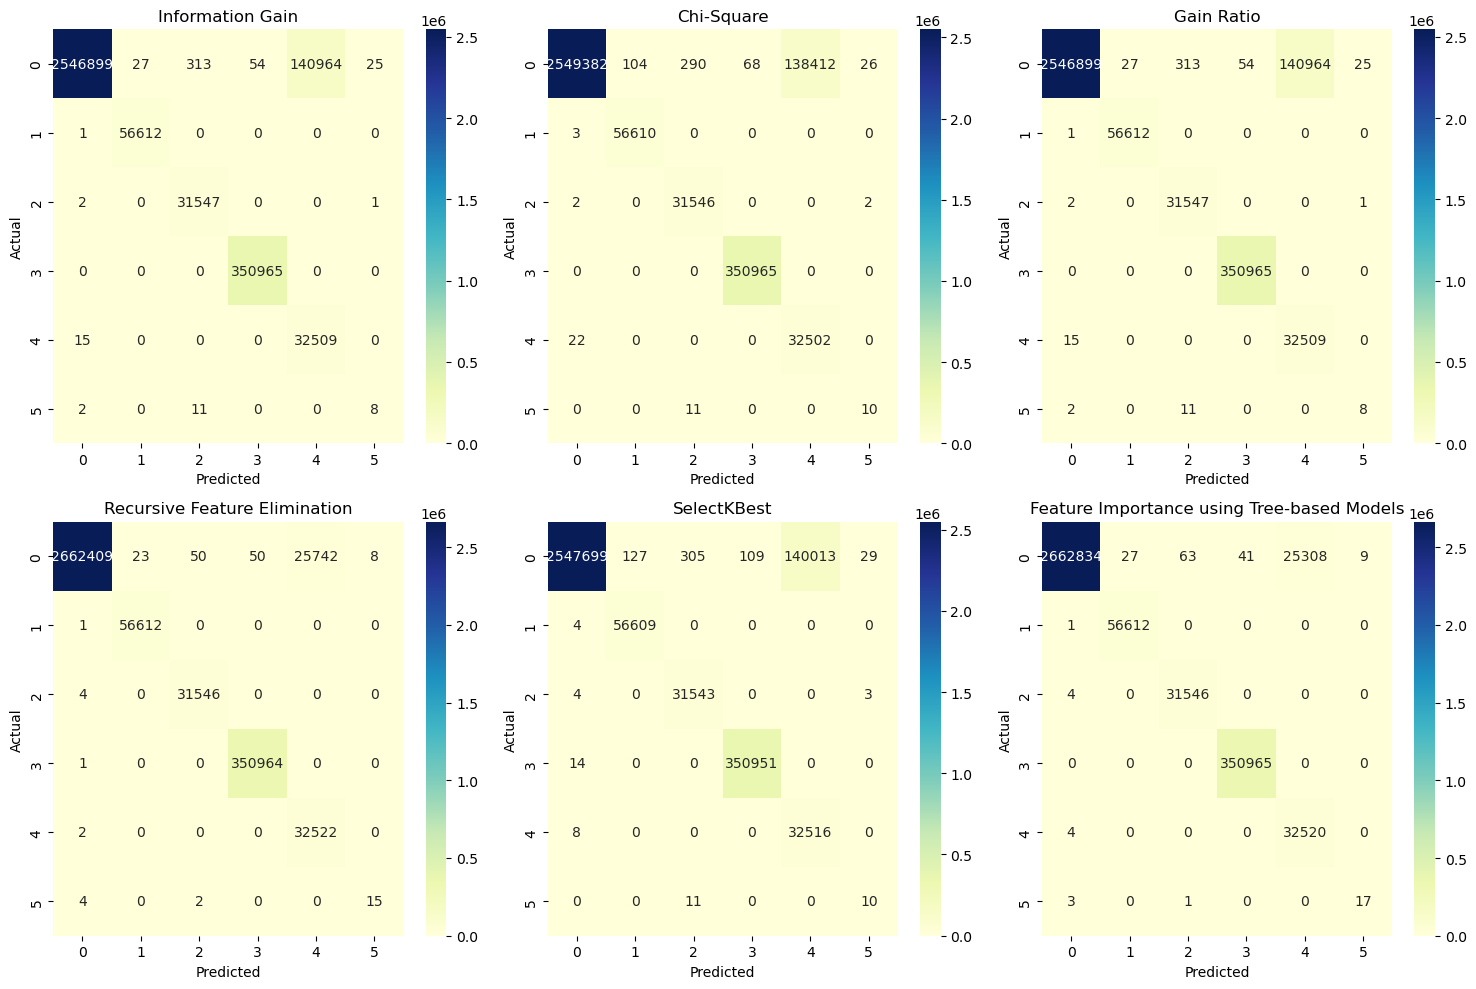

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the models and their predictions
models = {
    "Information Gain": y_pred_ig,
    "Chi-Square": y_pred_cs,
    "Gain Ratio": y_pred_gr,
    "Recursive Feature Elimination": y_pred_rfe,
    "SelectKBest": y_pred_skb,
    "Feature Importance using Tree-based Models": y_pred_rf,
}

# Compute confusion matrices and plot heatmaps
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for i, (name, y_pred) in enumerate(models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", ax=axes[i])
    axes[i].set_title(name)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [15]:
# Define the selected columns by each technique
selected_columns = {
    "Information Gain": selected_columns_ig,
    "Chi-Square": selected_columns_cs,
    "Gain Ratio": selected_columns_gr,
    "Recursive Feature Elimination": selected_columns_rfe,
    "SelectKBest": selected_columns_skb,
    "Feature Importance using Tree-based Models": selected_columns_rf,
}

# Print the selected features
for name, columns in selected_columns.items():
    print(f"{name}:")
    for column in columns:
        print(f"  - {column}")
    print()

Information Gain:
  - Dst Port
  - Flow Duration
  - TotLen Fwd Pkts
  - Fwd Pkt Len Max
  - Bwd Pkt Len Max
  - Flow IAT Mean
  - Flow IAT Max
  - Fwd IAT Tot
  - Fwd IAT Mean
  - Fwd IAT Max
  - Fwd IAT Min
  - Fwd Header Len
  - Bwd Header Len
  - Fwd Pkts/s
  - Pkt Len Max
  - Pkt Len Var
  - Subflow Fwd Byts
  - Init Fwd Win Byts
  - Init Bwd Win Byts
  - Date

Chi-Square:
  - Dst Port
  - Protocol
  - Flow Duration
  - Bwd Pkt Len Max
  - Bwd Pkt Len Min
  - Flow IAT Max
  - Fwd IAT Tot
  - Fwd IAT Max
  - Bwd IAT Tot
  - Fwd PSH Flags
  - Bwd Pkts/s
  - SYN Flag Cnt
  - RST Flag Cnt
  - PSH Flag Cnt
  - ACK Flag Cnt
  - ECE Flag Cnt
  - Init Fwd Win Byts
  - Init Bwd Win Byts
  - Fwd Seg Size Min
  - Date

Gain Ratio:
  - Dst Port
  - Flow Duration
  - TotLen Fwd Pkts
  - Fwd Pkt Len Max
  - Bwd Pkt Len Max
  - Flow IAT Mean
  - Flow IAT Max
  - Fwd IAT Tot
  - Fwd IAT Mean
  - Fwd IAT Max
  - Fwd IAT Min
  - Fwd Header Len
  - Bwd Header Len
  - Fwd Pkts/s
  - Pkt Len Max
  - P

In [16]:
# Find the intersection of the two sets of selected features
combined_features_intersection = set(selected_columns_rfe).intersection(selected_columns_rf)

# Print the combined features
print("Combined Features (Intersection of Recursive Feature Elimination & Feature Importance using Tree-based Models):")
for feature in combined_features_intersection:
    print(f"  - {feature}")

# Print the size of the intersection
intersection_size = len(combined_features_intersection)
print(f"Size of Intersection: {intersection_size}")

Combined Features (Intersection of Recursive Feature Elimination & Feature Importance using Tree-based Models):
  - Fwd IAT Min
  - TotLen Fwd Pkts
  - Date
  - Subflow Fwd Byts
  - Flow IAT Max
  - Dst Port
  - Fwd IAT Max
  - Bwd Pkts/s
  - Time
  - Flow Duration
  - Fwd IAT Tot
  - Fwd IAT Mean
  - Fwd Header Len
  - Fwd Pkts/s
  - Init Fwd Win Byts
  - Flow IAT Mean
Size of Intersection: 16


In [17]:
# Find the union of the two sets of selected features
combined_features_union = set(selected_columns_rfe).union(selected_columns_rf)

# Print the combined features
print("Combined Features (Union of Recursive Feature Elimination & Feature Importance using Tree-based Models):")
for feature in combined_features_union:
    print(f"  - {feature}")

# Print the size of the intersection
union_size = len(combined_features_union)
print(f"Size of Union: {union_size}")

Combined Features (Union of Recursive Feature Elimination & Feature Importance using Tree-based Models):
  - TotLen Fwd Pkts
  - Date
  - Bwd Pkts/s
  - Flow Duration
  - Fwd Seg Size Min
  - Fwd IAT Tot
  - Fwd Pkt Len Max
  - Fwd IAT Mean
  - Fwd Header Len
  - Pkt Len Var
  - Init Fwd Win Byts
  - Flow IAT Mean
  - Init Bwd Win Byts
  - Fwd IAT Min
  - Subflow Fwd Byts
  - Flow IAT Max
  - Bwd IAT Tot
  - Dst Port
  - Fwd IAT Max
  - Time
  - Bwd IAT Max
  - Fwd Pkts/s
  - Bwd Header Len
Size of Union: 23
